<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end. 


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [ ]:
# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

In [ ]:
# path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [ ]:
# await download(path, "Weather_Data.csv")
# filename ="Weather_Data.csv"

In [ ]:
# df = pd.read_csv("Weather_Data.csv")

> Note: This version of the lab is designed for JupyterLite, which necessitates downloading the dataset to the interface. However, when working with the downloaded version of this notebook on your local machines (Jupyter Anaconda), you can simply **skip the steps above of "Importing the Dataset"** and use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [7]:
#original file download
filepath ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'
df_original = pd.read_csv(filepath, header=0)
file_path = r"C:\Users\Raegan\Downloads\MachineLearning_FinalProj_WeatherPrediction_Original.csv"  #remname file
try:
    df_original.to_csv(file_path, index=False)
    print(f'DataFrame saved to {file_path}')
except Exception as e:
    print(f'An error occurred: {e}')

DataFrame saved to C:\Users\Raegan\Downloads\MachineLearning_FinalProj_WeatherPrediction_Original.csv


In [9]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv"
df = pd.read_csv(filepath)

In [10]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [15]:
df.columns


Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [22]:
print(df.dtypes)


Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
WindDir9am        object
WindDir3pm        object
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [50]:
#will get boolena values if drop_first not included (not working)
df_sydney_processed = pd.get_dummies(df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True)
print(df_sydney_processed.head())
print(df_sydney_processed.columns)

       Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  2/1/2008     19.5     22.4      15.6          6.2       0.0             41   
1  2/2/2008     19.5     25.6       6.0          3.4       2.7             41   
2  2/3/2008     21.6     24.5       6.6          2.4       0.1             41   
3  2/4/2008     20.2     22.8      18.8          2.2       0.0             41   
4  2/5/2008     19.7     25.7      77.4          4.8       0.0             41   

   WindSpeed9am  WindSpeed3pm  Humidity9am  ...  WindDir3pm_NNW  \
0            17            20           92  ...           False   
1             9            13           83  ...           False   
2            17             2           88  ...           False   
3            22            20           83  ...           False   
4            11             6           88  ...           False   

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0          False         Fals

### convert form bool to float in later step after drop date 


In [42]:
#view the one-hot encoded values
# Print one-hot encoded columns that start with 'RainToday', 'WindGustDir', 'WindDir9am', and 'WindDir3pm'
rain_today_columns = df_sydney_processed.filter(like='RainToday')
wind_gust_dir_columns = df_sydney_processed.filter(like='WindGustDir')
wind_dir_9am_columns = df_sydney_processed.filter(like='WindDir9am')
wind_dir_3pm_columns = df_sydney_processed.filter(like='WindDir3pm')

print("One-hot encoded columns for RainToday:")
print(rain_today_columns.head())  # Adjust this to view more rows if necessary

print("\nOne-hot encoded columns for WindGustDir:")
print(wind_gust_dir_columns.head())

print("\nOne-hot encoded columns for WindDir9am:")
print(wind_dir_9am_columns.head())

print("\nOne-hot encoded columns for WindDir3pm:")
print(wind_dir_3pm_columns.head())


One-hot encoded columns for RainToday:
   RainToday_Yes
0           True
1           True
2           True
3           True
4           True

One-hot encoded columns for WindGustDir:
   WindGustDir_ENE  WindGustDir_ESE  WindGustDir_N  WindGustDir_NE  \
0            False            False          False           False   
1            False            False          False           False   
2            False            False          False           False   
3            False            False          False           False   
4            False            False          False           False   

   WindGustDir_NNE  WindGustDir_NNW  WindGustDir_NW  WindGustDir_S  \
0            False            False           False          False   
1            False            False           False          False   
2            False            False           False          False   
3            False            False           False          False   
4            False            False           

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [54]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [56]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [58]:
#after we drop date able to convert true false to float as date is string
df_sydney_processed = df_sydney_processed.astype(float)

In [60]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

In [62]:
print(df_sydney_processed.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     19.5     22.4      15.6          6.2       0.0           41.0   
1     19.5     25.6       6.0          3.4       2.7           41.0   
2     21.6     24.5       6.6          2.4       0.1           41.0   
3     20.2     22.8      18.8          2.2       0.0           41.0   
4     19.7     25.7      77.4          4.8       0.0           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_NNW  \
0          17.0          20.0         92.0         84.0  ...             0.0   
1           9.0          13.0         83.0         73.0  ...             0.0   
2          17.0           2.0         88.0         86.0  ...             0.0   
3          22.0          20.0         83.0         90.0  ...             0.0   
4          11.0           6.0         88.0         74.0  ...             0.0   

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0          

### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [72]:
#Enter Your Code and Execute
from sklearn.model_selection import train_test_split
#features= all columns except 'Rain Tomorrow", Y= target variable 'Rain Tomorrow" 80% training dat and 20% test data
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

# To confirm the shape of the splits
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (2616, 62)
x_test shape: (655, 62)
y_train shape: (2616,)
y_test shape: (655,)


#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [74]:
from sklearn.linear_model import LinearRegression

# Create the Linear Regression model- initializes model
LinearReg = LinearRegression()

# Train the model using the training data
LinearReg.fit(x_train, y_train)

# After training, you can print the coefficients and intercept
print("Coefficients:", LinearReg.coef_)
print("Intercept:", LinearReg.intercept_)


Coefficients: [-0.02369173  0.01300554  0.00072981  0.00649077 -0.03516427  0.00423762
  0.0018292   0.00078986  0.00095609  0.00856061  0.00769793 -0.00924424
 -0.00887454  0.01004774  0.01446555 -0.00348065  0.10804987 -0.12937946
  0.01600583 -0.12249539 -0.10985045 -0.1327843  -0.12935609  0.01379319
 -0.05878298  0.06065709 -0.03624567 -0.01187754 -0.01413698 -0.07172541
 -0.0464351  -0.03369382  0.00967438 -0.05043381 -0.06262227 -0.05811546
 -0.04945233 -0.11896451 -0.00173547 -0.05108992 -0.0533075  -0.06225402
 -0.04047426 -0.02435782 -0.04474655 -0.06107046 -0.02711472  0.00990952
  0.0749136   0.0413819   0.05237569  0.12753115  0.16213874  0.11192779
  0.16222455  0.0936385   0.04509525  0.16880373  0.13297521  0.11966904
  0.07093818  0.11928231]
Intercept: 1.154312462072605


#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [86]:
# trained model to make predictions on the test data
predictions = LinearReg.predict(x_test)

# Print predictions
#print(predictions)


#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
LR_mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
LR_rmse = np.sqrt(LR_mse)

# Calculate Mean Absolute Error (MAE)
LR_mae = mean_absolute_error(y_test, predictions)

# Calculate R-squared (R²)
LR_r2 = r2_score(y_test, predictions)

# Print the results
print(f"Mean Squared Error (MSE): {LR_mse}")
print(f"Root Mean Squared Error (RMSE): {LR_rmse}")
print(f"Mean Absolute Error (MAE): {LR_mae}")
print(f"R-squared (R²): {LR_r2}")


Mean Squared Error (MSE): 0.11572058282746572
Root Mean Squared Error (RMSE): 0.34017728146874493
Mean Absolute Error (MAE): 0.25631760994203845
R-squared (R²): 0.42713210736230156


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [84]:
Report = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R-squared (R²)'],
    'Value': [LR_mae, LR_mse, LR_r2]
})
print(Report)

                      Metric     Value
0  Mean Absolute Error (MAE)  0.256318
1   Mean Squared Error (MSE)  0.115721
2             R-squared (R²)  0.427132


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [88]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model with n_neighbors set to 4
KNN = KNeighborsClassifier(n_neighbors=4)

# Train the model using the training data (x_train, y_train)
KNN.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [92]:
#Enter You# Use the KNN model to make predictions on the testing data
predictions_KNN = KNN.predict(x_test)

# Display the predictions
#print(predictions_KNN)


#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code and Execute

In [102]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score

KNN_Accuracy_Score = accuracy_score(y_test, predictions_KNN) 
KNN_JaccardIndex = jaccard_score(y_test, predictions_KNN, average='binary')  # 'binary' for binary classification
KNN_F1_Score = f1_score(y_test, predictions_KNN)

print(f"Accuracy: {KNN_Accuracy_Score}")
print(f"Jaccard Index: {KNN_JaccardIndex}")
print(f"F1 Score: {KNN_F1_Score}")

Accuracy: 0.8183206106870229
Jaccard Index: 0.4251207729468599
F1 Score: 0.5966101694915255


### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [ ]:
#Enter Your Code and Execute

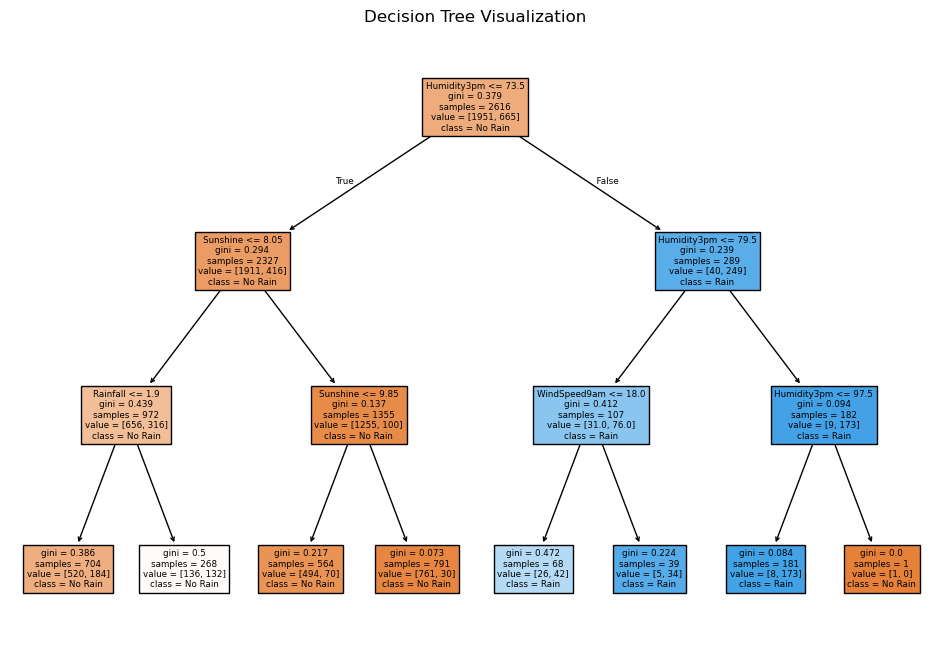

In [114]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create and train the Decision Tree model
max_depth_value = 3
Tree = DecisionTreeClassifier(max_depth=max_depth_value)  # You can add parameters here if needed
Tree.fit(x_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(Tree, filled=True, feature_names=x_train.columns, class_names=['No Rain', 'Rain'])
plt.title('Decision Tree Visualization')
plt.show()



#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [116]:
# Use the predict method on the testing data
predictions_Tree = Tree.predict(x_test)

# Display the predictions
#print(predictions)


#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code and Execute

In [120]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions_Tree) 
Tree_JaccardIndex = jaccard_score(y_test, predictions_Tree, average='binary')
Tree_F1_Score = f1_score(y_test, predictions_Tree)

print(f"Accuracy: {Tree_Accuracy_Score}")
print(f"Jaccard Index: {Tree_JaccardIndex}")
print(f"F1 Score: {Tree_F1_Score}")

Accuracy: 0.8030534351145038
Jaccard Index: 0.3613861386138614
F1 Score: 0.5309090909090909


### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [ ]:
#Enter Your Code and Execute

In [122]:
#features= all columns except 'Rain Tomorrow", Y= target variable 'Rain Tomorrow" 80% training dat and 20% test data
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1) #diffrent random state this time 

# Display the shapes of the resulting sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (2616, 62) (2616,)
Testing set shape: (655, 62) (655,)


#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [124]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model with the specified solver
LR = LogisticRegression(solver='liblinear')

# Train the model using the training data
LR.fit(x_train, y_train)

# Display the model coefficients
print("Model coefficients:", LR.coef_)
print("Intercept:", LR.intercept_)


Model coefficients: [[-1.71122455e-01  5.76940443e-02  1.21895443e-02  8.58386991e-03
  -2.47692676e-01  3.46526288e-02  1.07047348e-02  1.26286476e-02
   2.47638009e-02  5.10493764e-02  6.87195945e-02 -7.66089184e-02
  -1.34801586e-01  1.61832749e-01  1.32176321e-01  1.16096094e-02
   3.23486751e-01 -1.25765245e+00  3.26192552e-01 -4.64942230e-01
  -4.05279734e-01 -5.96270552e-01 -9.53737818e-02  5.19037765e-02
  -1.06297754e-01  5.71387931e-01  1.13877087e-01 -3.87621591e-02
   1.87404338e-01 -2.54413064e-01  5.20553891e-01  1.84287505e-01
   1.04394029e-01 -8.90843594e-02 -9.46039162e-02 -1.11476821e-01
   1.20580452e-01  2.40181210e-03  3.19043546e-01 -3.52483975e-01
  -8.08648876e-02 -1.11643319e-01 -1.99642772e-01  1.44409787e-01
  -7.76751945e-02 -4.57988709e-02 -2.93142124e-01 -1.70760849e-01
   3.19914937e-01 -3.86133786e-01  1.00883618e-04  5.80522849e-01
   3.02541877e-01 -9.75893246e-02  9.29836839e-01  5.40940763e-01
   3.18577288e-01  9.60076101e-01  5.82171591e-01  3.479

#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.


In [126]:
# Use the predict method to get predicted classes - predicts class labels and stores them as array
predictions_LR = LR.predict(x_test)

# Use the predict_proba method to get predicted probabilities for class labels and stores them as array
predict_proba = LR.predict_proba(x_test)

# Display the first few predicted classes and their probabilities- test 
print("Predictions (first 5):", predictions[:5])
print("Predicted Probabilities (first 5):", predict_proba[:5])


Predictions (first 5): [0. 0. 1. 0. 0.]
Predicted Probabilities (first 5): [[0.75694679 0.24305321]
 [0.97704252 0.02295748]
 [0.50487614 0.49512386]
 [0.84127927 0.15872073]
 [0.97083865 0.02916135]]


#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [128]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, log_loss

# Accuracy Score
LR_Accuracy_Score = accuracy_score(y_test, predictions)

# Jaccard Index
LR_JaccardIndex = jaccard_score(y_test, predictions)

# F1 Score
LR_F1_Score = f1_score(y_test, predictions)

# Log Loss
LR_Log_Loss = log_loss(y_test, predict_proba)

# Display the metrics
print("Accuracy Score:", LR_Accuracy_Score)
print("Jaccard Index:", LR_JaccardIndex)
print("F1 Score:", LR_F1_Score)
print("Log Loss:", LR_Log_Loss)


Accuracy Score: 0.6549618320610687
Jaccard Index: 0.09236947791164658
F1 Score: 0.16911764705882354
Log Loss: 0.3806209086013746


### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [130]:
from sklearn.svm import SVC

# Create an instance of the SVM model
SVM = SVC()

# Train the model using the training data
SVM.fit(x_train, y_train)


SVC()

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code and Execute

In [134]:
predictions_SVM = SVM.predict(x_test)

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [142]:
# Calculate metrics
SVM_Accuracy_Score = accuracy_score(y_test, predictions_SVM)
SVM_JaccardIndex = jaccard_score(y_test, predictions_SVM, average='binary')  # Use 'binary' for binary classification
SVM_F1_Score = f1_score(y_test, predictions_SVM)

# Display the results
print(f"SVM Accuracy Score: {SVM_Accuracy_Score:.4f}")
print(f"SVM Jaccard Index: {SVM_JaccardIndex:.6f}")
print(f"SVM F1 Score: {SVM_F1_Score:.6f}")

SVM Accuracy Score: 0.7221
SVM Jaccard Index: 0.000000
SVM F1 Score: 0.000000


### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [146]:
report_data = {
    'Model': ['KNN', 'Decision Tree', 'Logistic Regression', 'SVM'],
    'Accuracy': [KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score],
    'Jaccard Index': [KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex],
    'F1 Score': [KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score],
    'Log Loss': [None, None, LR_Log_Loss, None]  
}
Report_All = pd.DataFrame(report_data)
print(Report_All)

                 Model  Accuracy  Jaccard Index  F1 Score  Log Loss
0                  KNN  0.818321       0.425121  0.596610       NaN
1        Decision Tree  0.803053       0.361386  0.530909       NaN
2  Logistic Regression  0.654962       0.092369  0.169118  0.380621
3                  SVM  0.722137       0.000000  0.000000       NaN


<h2 id="Section_5">  How to submit </h2>

<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.

<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

### Other Contributors

[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<!--
## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2022-06-22        | 2.0     | Svitlana K.   | Deleted GridSearch and Mock |
--!>